<a href="https://colab.research.google.com/github/salv0304/Colab/blob/main/Materia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Esperienza 1A**

In [ ]:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt  
from google.colab import files
import pandas as pd
from google.colab import files
from scipy.optimize import curve_fit 
from scipy import fmin

##Vetro 

###Polarizzazione p

<ipython-input-2-3794a0006850>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati=np.loadtxt("vetro_p.txt", dtype=np.str, delimiter="\t", skiprows=1)
<ipython-input-2-3794a0006850>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati = dati.astype(np.float)


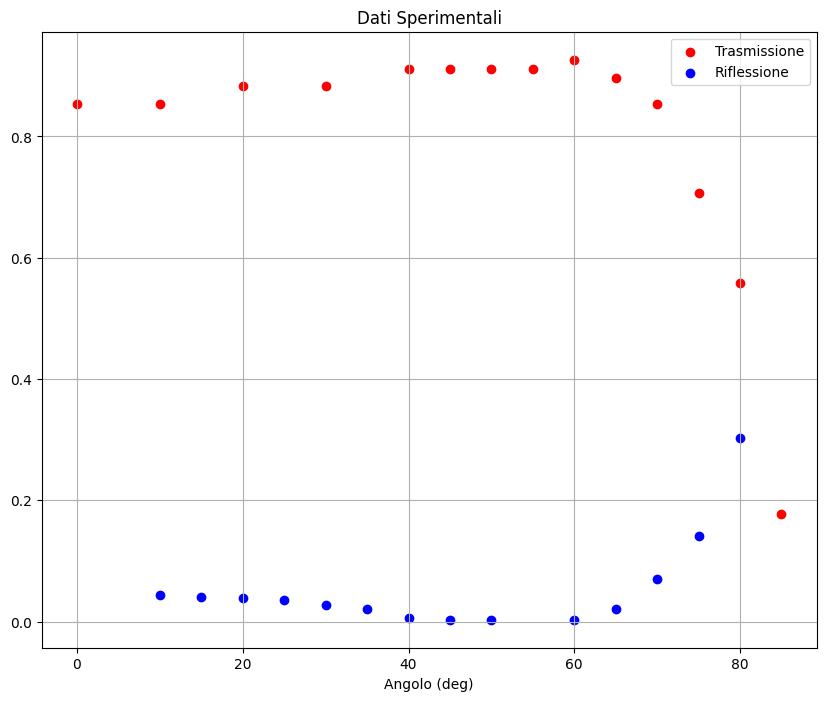

In [ ]:
#I dati
dati=np.loadtxt("vetro_p.txt", dtype=np.str, delimiter="\t", skiprows=1) 
dati = dati.astype(np.float)


angolo_t=dati[:,0]
V_t=[i/34 for i in dati[:,1]]
angolo_r=dati[:,2]
V_r=[i/34 for i in dati[:,3]]

#il grafico

plt.figure(figsize=[10,8])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400

plt.scatter(angolo_t, V_t, color='red', label= 'Trasmissione')
plt.scatter(angolo_r, V_r, color='blue', label= 'Riflessione')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.ylabel("")
plt.xlabel("Angolo (deg)")
plt.legend()

####Fit Riflessione p

In [ ]:
def Riflessione_p(theta,n):
    R=((n*np.cos(theta*3.14/180)-1)/(n*np.cos(theta*3.14/180)+1))**2
    return R

In [ ]:
def fitplot(n, print_output=True, plot_guess=False):
 
  guess = np.array([n]) #array of initial guesses
  bounds = ([-np.inf], [np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(Riflessione_p, angolo_r, V_r, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, Riflessione_p(t, guess[0]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = V_r- Riflessione_p(angolo_r, popt[0])
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((V_r-np.mean(V_r))**2)
  r_squared = 1 - (ss_res / ss_tot)
                                                                                                
  #plotting fit result
  ndata=len(V_r)
  plt.figure(figsize=[10,6])
  xmin,xmax=angolo_r[0],angolo_r[ndata-1]
  x=np.arange(0,90+1e-5,0.01)
  y=Riflessione_p(x,popt[0])
  plt.ylabel('', fontsize=20)
  plt.xlabel('Angolo (deg)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(angolo_r, V_r,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit ($R^2=${:.4f})".format(r_squared))
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["n"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%12s = %9.12f +- %7.10f" % (l ,v, e))
    print("\n")

<Figure size 900x600 with 0 Axes>

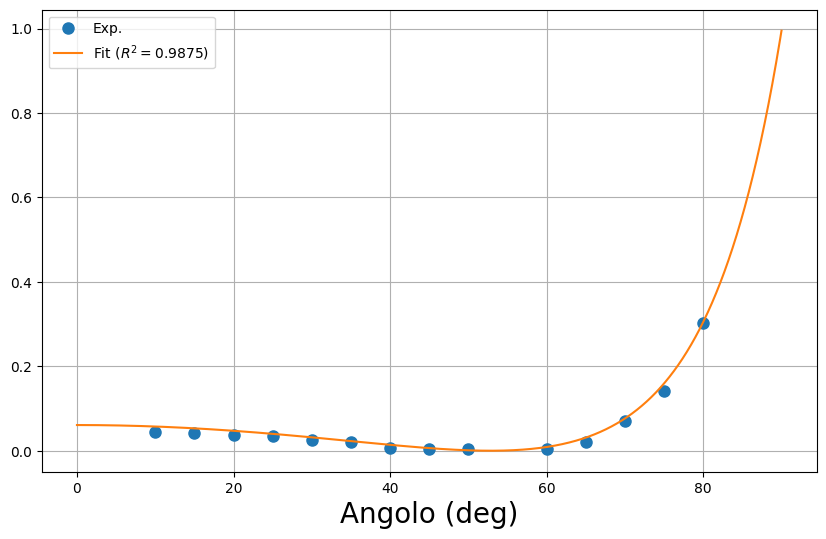

           n = 1.654784860746 +- 0.0189373389




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(1.4)

###Polarizzazione s

<ipython-input-19-8092346efc1d>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati=np.loadtxt("vetro_s.txt", dtype=np.str, delimiter="\t", skiprows=1)
<ipython-input-19-8092346efc1d>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati = dati.astype(np.float)


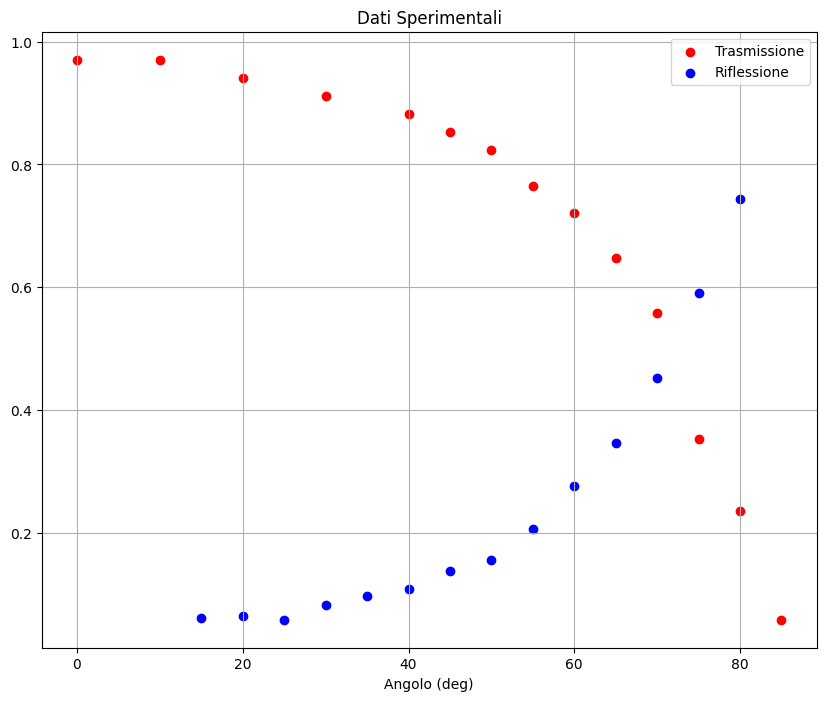

In [ ]:
#I dati
dati=np.loadtxt("vetro_s.txt", dtype=np.str, delimiter="\t", skiprows=1) 
dati = dati.astype(np.float)

angolo_t=dati[:,0]
V_t=[i/34 for i in dati[:,1]]
angolo_r=dati[:,2]
V_r=[i/34 for i in dati[:,3]]

#il grafico

plt.figure(figsize=[10,8])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400

plt.scatter(angolo_t, V_t, color='red', label= 'Trasmissione')
plt.scatter(angolo_r, V_r, color='blue', label= 'Riflessione')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.ylabel("")
plt.xlabel("Angolo (deg)")
plt.legend()

####Fit Riflessione s

In [ ]:
def Riflessione_s(theta,n):
    R=((np.cos(theta*3.14/180)-n)/(np.cos(theta*3.14/180)+n))**2
    return R

In [ ]:
def fitplot(n, print_output=True, plot_guess=False):
 
  guess = np.array([n]) #array of initial guesses
  bounds = ([-np.inf], [np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(Riflessione_s, angolo_r, V_r, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, Riflessione_s(t, guess[0]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = V_r- Riflessione_s(angolo_r, popt[0])
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((V_r-np.mean(V_r))**2)
  r_squared = 1 - (ss_res / ss_tot)
                                                                                                
  #plotting fit result
  ndata=len(V_r)
  plt.figure(figsize=[10,6])
  xmin,xmax=angolo_r[0],angolo_r[ndata-1]
  x=np.arange(0,90+1e-5,0.01)
  y=Riflessione_s(x,popt[0])
  plt.ylabel('', fontsize=20)
  plt.xlabel('Angolo (deg)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(angolo_r, V_r,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit ($R^2=${:.4f})".format(r_squared))
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["n"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%12s = %9.12f +- %7.10f" % (l ,v, e))
    print("\n")

<Figure size 900x600 with 0 Axes>

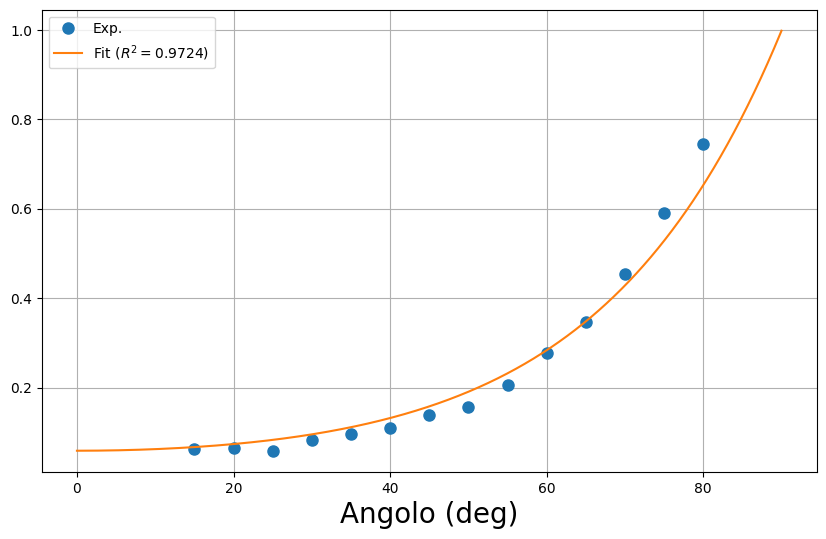

           n = 1.640103459663 +- 0.0488846658




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(1.4)

###Risultati
Secondo i fit la miglior stima per $n$ è $n= 1.647 \pm 0.033$ (mediando i risultati dei due fit)

Mentre se invece calcoliamo $n$ attraverso l'angolo di Brewster, che nel nostro caso è $\phi_b=55°$, allora troviamo che $n(\lambda=600nm)=tan\phi_b=1.428$.

Il valore tabulato per SiO2 a $\lambda=600nm$ è $n_0=1.463$.



##Wafer di Silicio

Il silicio non trasmette praticamente nulla. Studiamo solo la Riflessione in p e in s.

<ipython-input-23-fc041b152a56>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati=np.loadtxt("silicio.txt", dtype=np.str, delimiter="\t", skiprows=1)
<ipython-input-23-fc041b152a56>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dati = dati.astype(np.float)


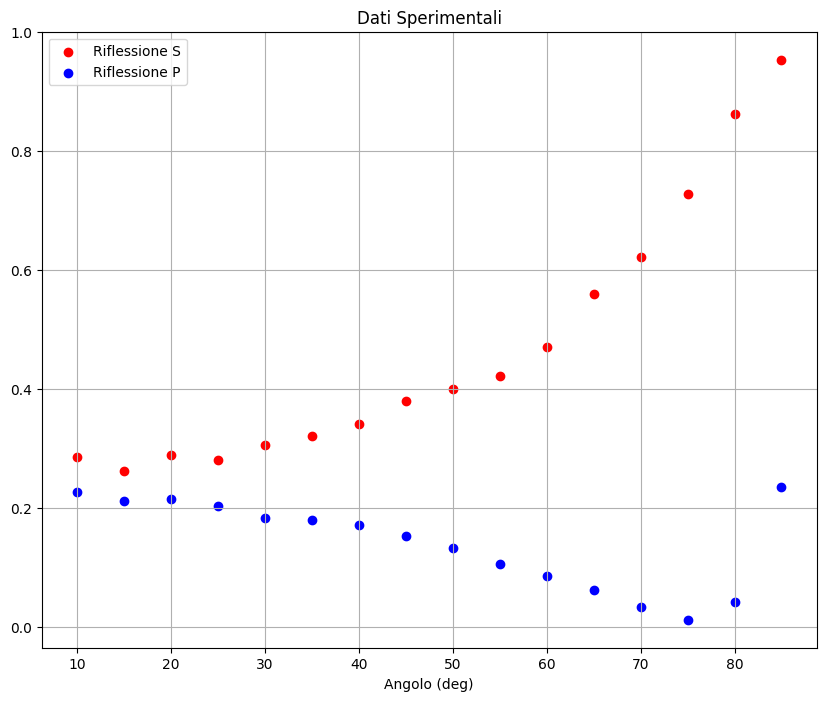

In [ ]:
from matplotlib.rcsetup import validate_fonttype
#I dati
dati=np.loadtxt("silicio.txt", dtype=np.str, delimiter="\t", skiprows=1) 
dati = dati.astype(np.float)

#I_Led1=dati[:,0]
#I_Led = [i / 1000 for i in I_Led1] #conversione in SI

angolo_s=dati[:,0]
V_s=[i/34 for i in dati[:,1]]
angolo_p=dati[:,2]
V_p=[i/34 for i in dati[:,3]]

#il grafico

plt.figure(figsize=[10,8])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400

plt.scatter(angolo_s, V_s, color='red', label= 'Riflessione S')
plt.scatter(angolo_p, V_p, color='blue', label= 'Riflessione P')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.ylabel("")
plt.xlabel("Angolo (deg)")
plt.legend()

###Fit Riflessione p


In [ ]:
def Riflessione_p(theta,n):
    R=((n*np.cos(theta*3.14/180)-1)/(n*np.cos(theta*3.14/180)+1))**2
    return R

In [ ]:
#Per ottenere una buona stima di n voglio fittare ottimamente il minimo, alloa mi limito a considerare i punti sperimentali nell'intorno di esso

def fitplot(n, print_output=True, plot_guess=False):
 
  guess = np.array([n]) #array of initial guesses
  bounds = ([-np.inf], [np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(Riflessione_p, angolo_p[:6], V_p[:6], p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, Riflessione_p(t, guess[0]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = V_p[:6]- Riflessione_p(angolo_p[:6], popt[0])
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((V_p[:6]-np.mean(V_p[6]))**2)
  r_squared = 1 - (ss_res / ss_tot)
                                                                                                
  #plotting fit result
  ndata=len(V_p)
  plt.figure(figsize=[10,6])
  x=np.arange(60,90+1e-5,0.01)
  y=Riflessione_p(x,popt[0])
  plt.ylabel('', fontsize=20)
  plt.xlabel('Angolo (deg)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(angolo_p[:6], V_p[:6],'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit ($R^2=${:.4f})".format(r_squared))
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["n"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%12s = %9.12f +- %7.10f" % (l ,v, e))
    print("\n")

<Figure size 900x600 with 0 Axes>

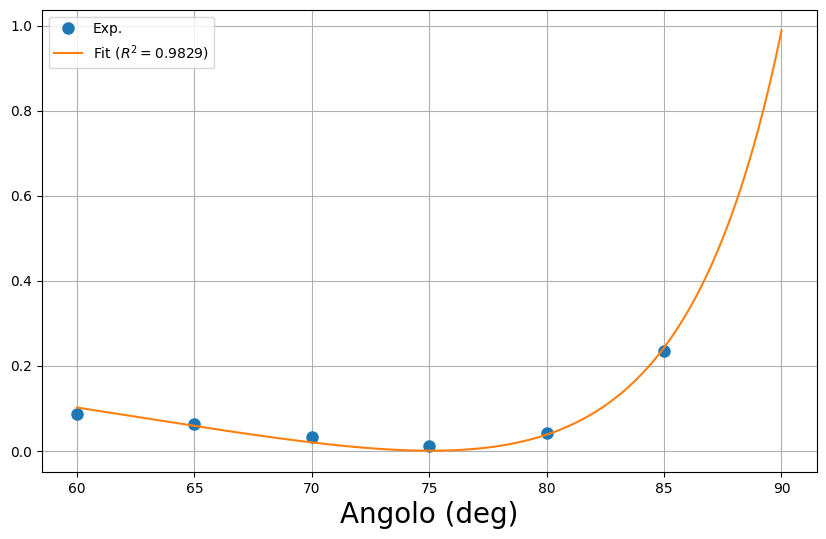

           n = 3.867750599083 +- 0.0768064071




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(4)

###Risultati
Secondo il fit la miglior stima per $n$ è $n= 3.867 \pm 0.077$

Mentre se invece calcoliamo $n$ attraverso l'angolo di Brewster, che nel nostro caso è $\phi_b=75°$, allora stroviamo che $n(\lambda=600nm)=tan\phi_b=3.732$.

Il valore tabulato a $\lambda=600nm$ è $n_0=3.940$.

In questo caso la miglior stima è data dal fit, in accordo entro $1\sigma$ con il valore tabulato.